In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

### Reading the dataset and removing nan rows

In [77]:
db = pd.read_csv("linear_regression_dataset.csv")
print("total number of rows before removing nan rows ", len(db))
db = db.dropna(axis=0)
print("total number of rows after removing nan rows ", len(db))

total number of rows before removing nan rows  20640
total number of rows after removing nan rows  20433


In [80]:
print("The columns in the dataset are:\n", list(db.columns))

The columns in the dataset are:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value']


### The uniqe values of the column 'ocean_proximity'

In [81]:
list(db['ocean_proximity'].unique())

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

### Analysing the dataset

In [82]:
db.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Patterns of house prices on ocean proximity and median income

###

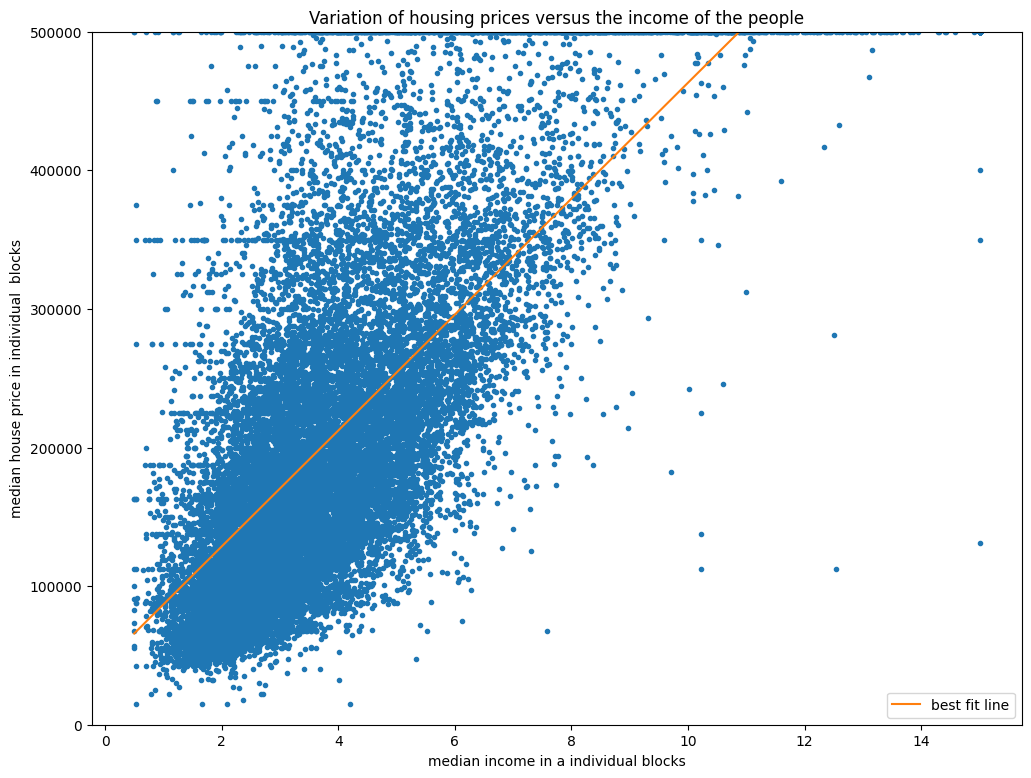

In [83]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 9))

ax.plot(db["median_income"], db["median_house_value"], ".")
ax.set_xlabel("median income in a individual blocks")
ax.set_ylabel("median house price in individual  blocks")
ax.set_title("Variation of housing prices versus the income of the people")
ax.plot(np.unique(db["median_income"]), np.poly1d(np.polyfit(db["median_income"], db["median_house_value"], 1))(np.unique(db["median_income"])), label='best fit line')
ax.set_ylim(0, 500000)
ax.legend()

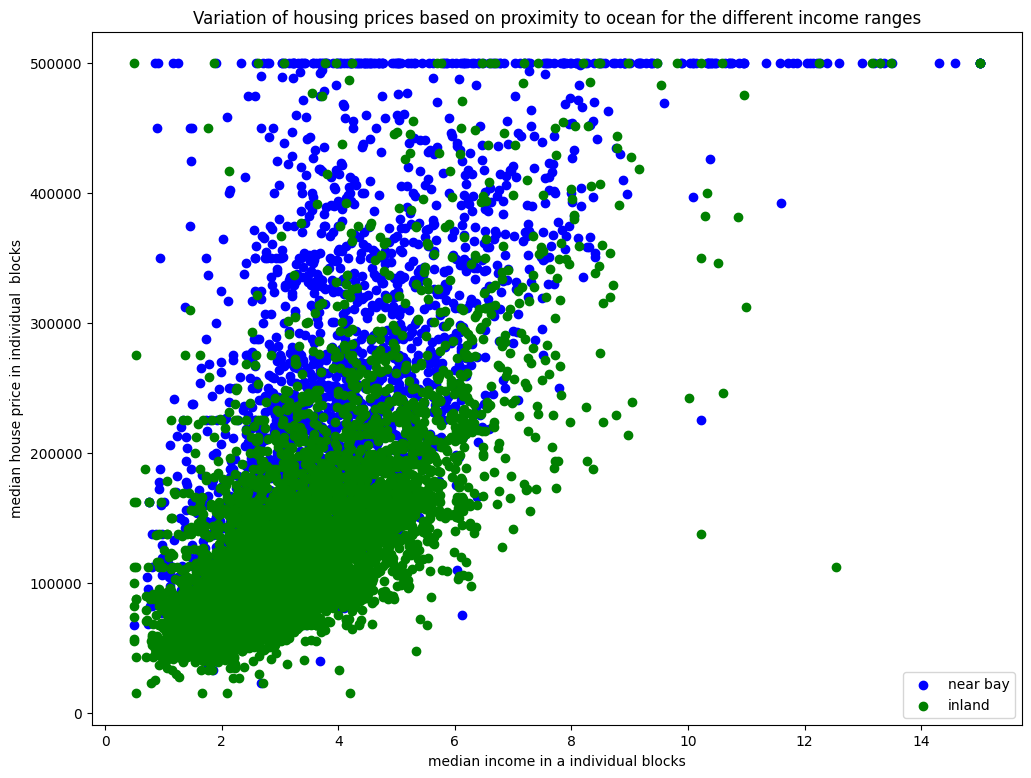

In [84]:

fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(db[db['ocean_proximity']=='NEAR BAY']["median_income"], db[db['ocean_proximity']=='NEAR BAY']["median_house_value"], color='blue', label='near bay')
ax.scatter(db[db['ocean_proximity']=='INLAND']["median_income"], db[db['ocean_proximity']=='INLAND']["median_house_value"], color='green', label='inland')
ax.set_xlabel("median income in a individual blocks")
ax.set_ylabel("median house price in individual  blocks")
ax.set_title("Variation of housing prices based on proximity to ocean for the different income ranges")
ax.legend()

###

### Approx encoding of the proximity feature

In [85]:
db.loc[db['ocean_proximity']=="NEAR BAY", 'near_ocean'] = 2
db.loc[db['ocean_proximity']=="<1H OCEAN", 'near_ocean'] = 2
db.loc[db['ocean_proximity']=="INLAND", 'near_ocean'] = 3
db.loc[db['ocean_proximity']=="NEAR OCEAN", 'near_ocean'] = 2
db.loc[db['ocean_proximity']=="ISLAND", 'near_ocean'] = 1

### Separating features and targets

In [90]:
X = db.loc[:, ['housing_median_age', 'total_rooms', 'total_bedrooms' ,'population','households','median_income','near_ocean']]
y = db.loc[:, ['median_house_value']]

### Train test splitting

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

### Model definition and fitting

In [92]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Prediction and metrics calcualtion

In [95]:
y_predicted = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test,y_predicted)
print("The mean absolute percentage error is ", mape)

The mean absolute percentage error is  0.28926216742695043
